In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Define State and Action spaces

In [129]:
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

## Define R Matrix

In [130]:
# Initialize R matrix with np.nan in all cells
R =  np.array([[np.nan for a in A] for s in S])

possible_actions = [(0,1), (1,0), (1,4), (2,6), (3,8), (4,1), (4,5), (5,4), (5,6), (6,2), (6,5), (6,7), (6,11), (7,6), (7,8), (8,3), (8,7), (8,9), (9,8), (10,12), (11,6), (11,15), (12,10), (12,13), (13,12), (13,14), (13,19), (14,13), (14,15), (15,11), (15,14), (15,16), (16,15), (16,17), (16,20), (17,16), (17,18), (18,17), (18,21), (19,13), (19,22), (20,16), (20,23), (21,18), (22,19), (22,26), (23,20), (23,24), (24,23), (24,28), (25,26), (26,22), (26,25), (26,27), (27,26), (28,24), (28,29), (29,28)]


for s,a in possible_actions:
    if a == 29:
        R[s,a] = 100
    else:
        R[s,a] = -1
        
print('R matrix: \n\n{}'.format(R))

R matrix: 

[[ nan  -1.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan]
 [ -1.  nan  nan  nan  -1.  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan]
 [ nan  nan  nan  nan  nan  nan  -1.  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan  -1.  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan]
 [ nan  -1.  nan  nan  nan  -1.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan]
 [ nan  nan  nan  nan  -1.  nan  -1.  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan]
 [ nan  nan  -1.  nan  nan  -1.  nan  -1.  nan

In [131]:
Q = np.zeros(R.shape)

print('Q matrix: \n\n{}'.format(Q))

Q matrix: 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [132]:
# Learning params
alpha = 0.9
gamma = 0.9
epsilon=0.9

# States and Actions
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

goal_state = 29

# R matrix
possible_actions = [(0,1), (1,0), (1,4), (2,6), (3,8), (4,1), (4,5), (5,4), (5,6), (6,2), (6,5), (6,7), (6,11), (7,6), (7,8), (8,3), (8,7), (8,9), (9,8), (10,12), (11,6), (11,15), (12,10), (12,13), (13,12), (13,14), (13,19), (14,13), (14,15), (15,11), (15,14), (15,16), (16,15), (16,17), (16,20), (17,16), (17,18), (18,17), (18,21), (19,13), (19,22), (20,16), (20,23), (21,18), (22,19), (22,26), (23,20), (23,24), (24,23), (24,28), (25,26), (26,22), (26,25), (26,27), (27,26), (28,24), (28,29), (29,28)]


for s,a in possible_actions:
    if a == 29:
        R[s,a] = 100
    else:
        R[s,a] = -1
        
# # Q matrix
Q = np.zeros(R.shape)

In [133]:
s = np.random.choice(len(S))
print("Starting state is '{}'".format(S[s]))

for i in range(500):
    # Action selection
    available_actions = np.where(~np.isnan(R[s]))[0]
    print("Available actions from state '{}' are: {}".format(S[s], [A[x] for x in available_actions]))

    q_values = [Q[s,a] for a in available_actions]
    print('Q values for those actions from current state: {}'.format(q_values))

    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
    best_actions_q_values = [Q[s,x] for x in best_actions]

    if len(best_actions) > 1:
        print('Detected multiple actions with identical Q values. Agent will randomly select one of these.')
        print('Our best available actions from here are: {} with current q values: {}'.format(
            [A[x] for x in best_actions], best_actions_q_values))
    
    # Epsilon-greedy
    if np.random.uniform() > epsilon:
        a = np.random.choice(available_actions)
        print("Selecting random action '{}' with current Q value {}".format(A[a], Q[s,a]))
    else:
        a = np.random.choice(best_actions)
        print("Selecting greedy action '{}' with current Q value {}".format(A[a], Q[s,a]))


    # Environment updating
    r = R[s,a]
    print("Reward for taking action '{}' from state '{}': {}".format(A[a], S[s], r))

    s_old = s
    s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.
    print("After taking action '{}' from state '{}', new state is '{}'".format(A[a], S[s_old], S[s]))

    # Q value updating
    q_updated = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
    Q[s_old,a] = q_updated

    print("Q value update: " \
          "Q({},{}) = Q({},{}) + alpha*(r({},{}) + gamma*max(Q[{},:]) - Q[{},{}]) ".format(
        S[s_old], A[a], S[s_old], A[a], S[s_old], A[a], S[s],S[s_old], A[a]))

    print("Q matrix update: " \
          "Q({},{}) = {} + {}*({} + {}*{} - {}) = {}".format(
        S[s_old], A[a], Q[s_old,a].round(0), alpha, r, gamma, np.max(Q[s,:]).round(0), 
        Q[s_old,a].round(0), q_updated))

    print('Q matrix updated: \n\n {}'.format(Q.round(0)))

    if S[s] == goal_state:
        print("Goal state '{}' reached. Ending episode.".format(goal_state))
        break


Starting state is '26'
Available actions from state '26' are: [22, 25, 27]
Q values for those actions from current state: [0.0, 0.0, 0.0]
Detected multiple actions with identical Q values. Agent will randomly select one of these.
Our best available actions from here are: [22, 25, 27] with current q values: [0.0, 0.0, 0.0]
Selecting greedy action '22' with current Q value 0.0
Reward for taking action '22' from state '26': -1.0
After taking action '22' from state '26', new state is '22'
Q value update: Q(26,22) = Q(26,22) + alpha*(r(26,22) + gamma*max(Q[22,:]) - Q[26,22]) 
Q matrix update: Q(26,22) = -1.0 + 0.9*(-1.0 + 0.9*0.0 - -1.0) = -0.9
Q matrix updated: 

 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  

## Run Until Convergence

Run many episodes until Q matrix converges to final values

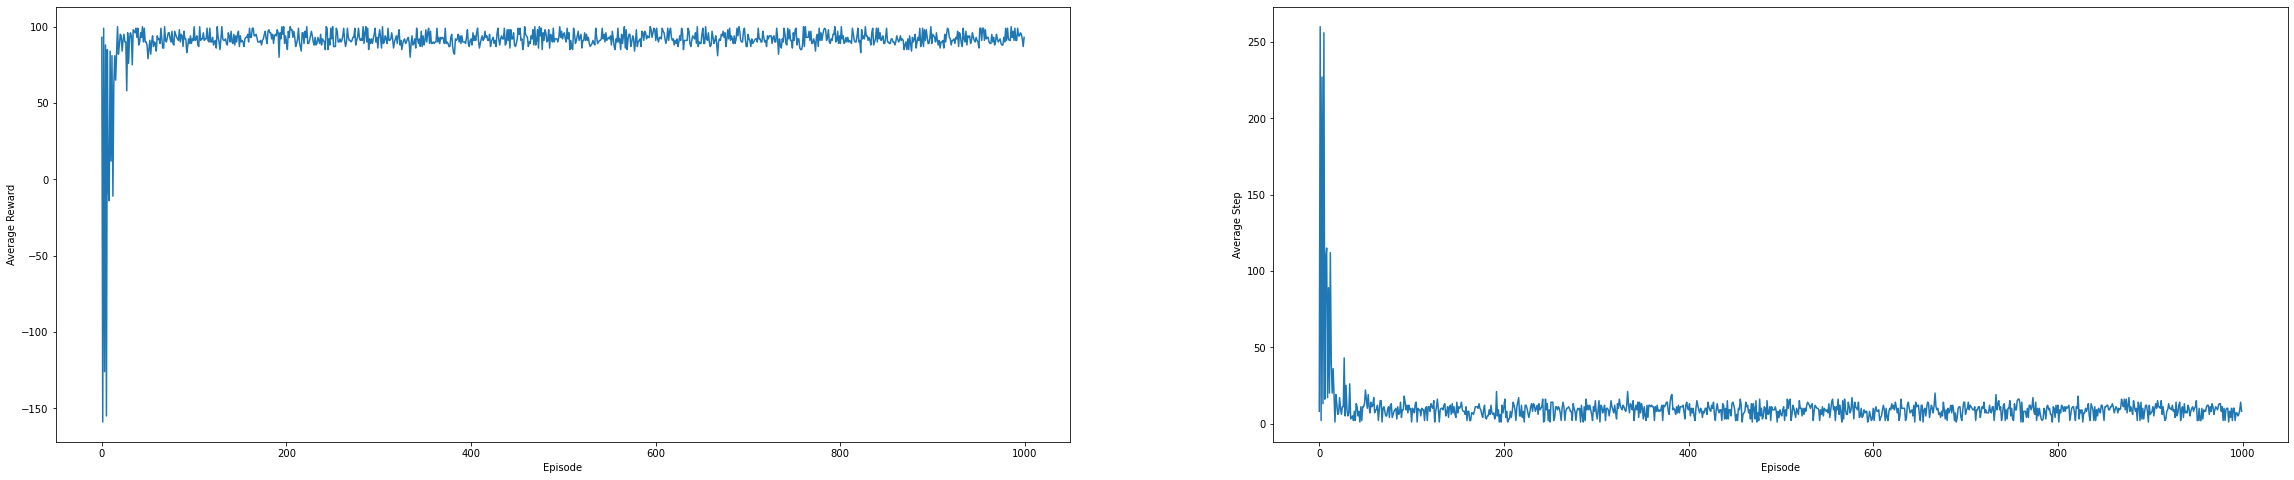

In [134]:
# Learning params
alpha = 0.3
gamma = 0.9
epsilon = 0.9

# States and Actions
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

goal_state = 29

# R matrix
possible_actions = [(0,1), (1,0), (1,4), (2,6), (3,8), (4,1), (4,5), (5,4), (5,6), (6,2), (6,5), (6,7), (6,11), (7,6), (7,8), (8,3), (8,7), (8,9), (9,8), (10,12), (11,6), (11,15), (12,10), (12,13), (13,12), (13,14), (13,19), (14,13), (14,15), (15,11), (15,14), (15,16), (16,15), (16,17), (16,20), (17,16), (17,18), (18,17), (18,21), (19,13), (19,22), (20,16), (20,23), (21,18), (22,19), (22,26), (23,20), (23,24), (24,23), (24,28), (25,26), (26,22), (26,25), (26,27), (27,26), (28,24), (28,29), (29,28)]


for s,a in possible_actions:
    if a == 29:
        R[s,a] = 100
    else:
        R[s,a] = -1
        
# # Q matrix
Q = np.zeros(R.shape)
total_reward = []
total_step_per_episode = []

# Run
for episode in range(1000):
    #print("This is episode " + str(episode))
    s = np.random.choice(len(S))
    #print("Starting state is '{}'".format(S[s]))
    episode_reward = 0
    stepcount = 0
    for timestep in range(500):
        # Action selection
        #print("This is " + str(timestep))
        available_actions = np.where(~np.isnan(R[s]))[0]
        q_values = [Q[s,a] for a in available_actions]
        best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
        best_actions_q_values = [Q[s,x] for x in best_actions]
        
        # Epsilon-greedy
        if np.random.uniform() > epsilon:
            a = np.random.choice(available_actions)
        else:
            a = np.random.choice(best_actions)

        # Environment updating
        r = R[s,a]
        episode_reward += r
        #print(episode_reward)
        stepcount = stepcount + 1
        s_old = s
        s = a 

        # Q value updating
        Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])

        if S[s] == goal_state:
            break
    total_reward.append(episode_reward)
    total_step_per_episode.append(stepcount)
    #timesteps.append(timestep)
    #print(total_reward)

    #print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))
    

plt.figure(figsize=(40,8))
plt.subplot(1, 2, 1)
plt.plot(total_reward)
plt.ylabel('Average Reward')
plt.xlabel('Episode')

plt.subplot(1, 2, 2)
plt.plot(total_step_per_episode)
plt.ylabel('Average Step')
plt.xlabel('Episode')

plt.show()

## Hyperparameter Tuning - Learning Rate

In [135]:
# Learning params
learning_rate_values = [0.9, 0.6, 0.3, 0.1]
gamma = 0.9
epsilon = 0.9

chart_data = []

# States and Actions
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

goal_state = 29

# R matrix
possible_actions = [(0,1), (1,0), (1,4), (2,6), (3,8), (4,1), (4,5), (5,4), (5,6), (6,2), (6,5), (6,7), (6,11), (7,6), (7,8), (8,3), (8,7), (8,9), (9,8), (10,12), (11,6), (11,15), (12,10), (12,13), (13,12), (13,14), (13,19), (14,13), (14,15), (15,11), (15,14), (15,16), (16,15), (16,17), (16,20), (17,16), (17,18), (18,17), (18,21), (19,13), (19,22), (20,16), (20,23), (21,18), (22,19), (22,26), (23,20), (23,24), (24,23), (24,28), (25,26), (26,22), (26,25), (26,27), (27,26), (28,24), (28,29), (29,28)]

for alpha in learning_rate_values:

    for s,a in possible_actions:
        if a == 29:
            R[s,a] = 100
        else:
            R[s,a] = -1

    # # Q matrix
    Q = np.zeros(R.shape)
    total_reward = []
    total_step_per_episode = []

    for episode in range(1000):
        s = np.random.choice(len(S))
        #print("Starting state is '{}'".format(S[s]))
        episode_reward = 0
        stepcount = 0
        for timestep in range(500):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            episode_reward += r
            #print(episode_reward)
            stepcount = stepcount + 1
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])

            if S[s] == goal_state:
                break
        total_reward.append(episode_reward)
        total_step_per_episode.append(stepcount)
    chart_data_per_learning_rate = pd.DataFrame({'Total Reward': total_reward, 'Total Step Per Episode': total_step_per_episode, 'Learning Rate Value': alpha})
    chart_data.append(chart_data_per_learning_rate)
    

    
chart_data = pd.concat(chart_data)


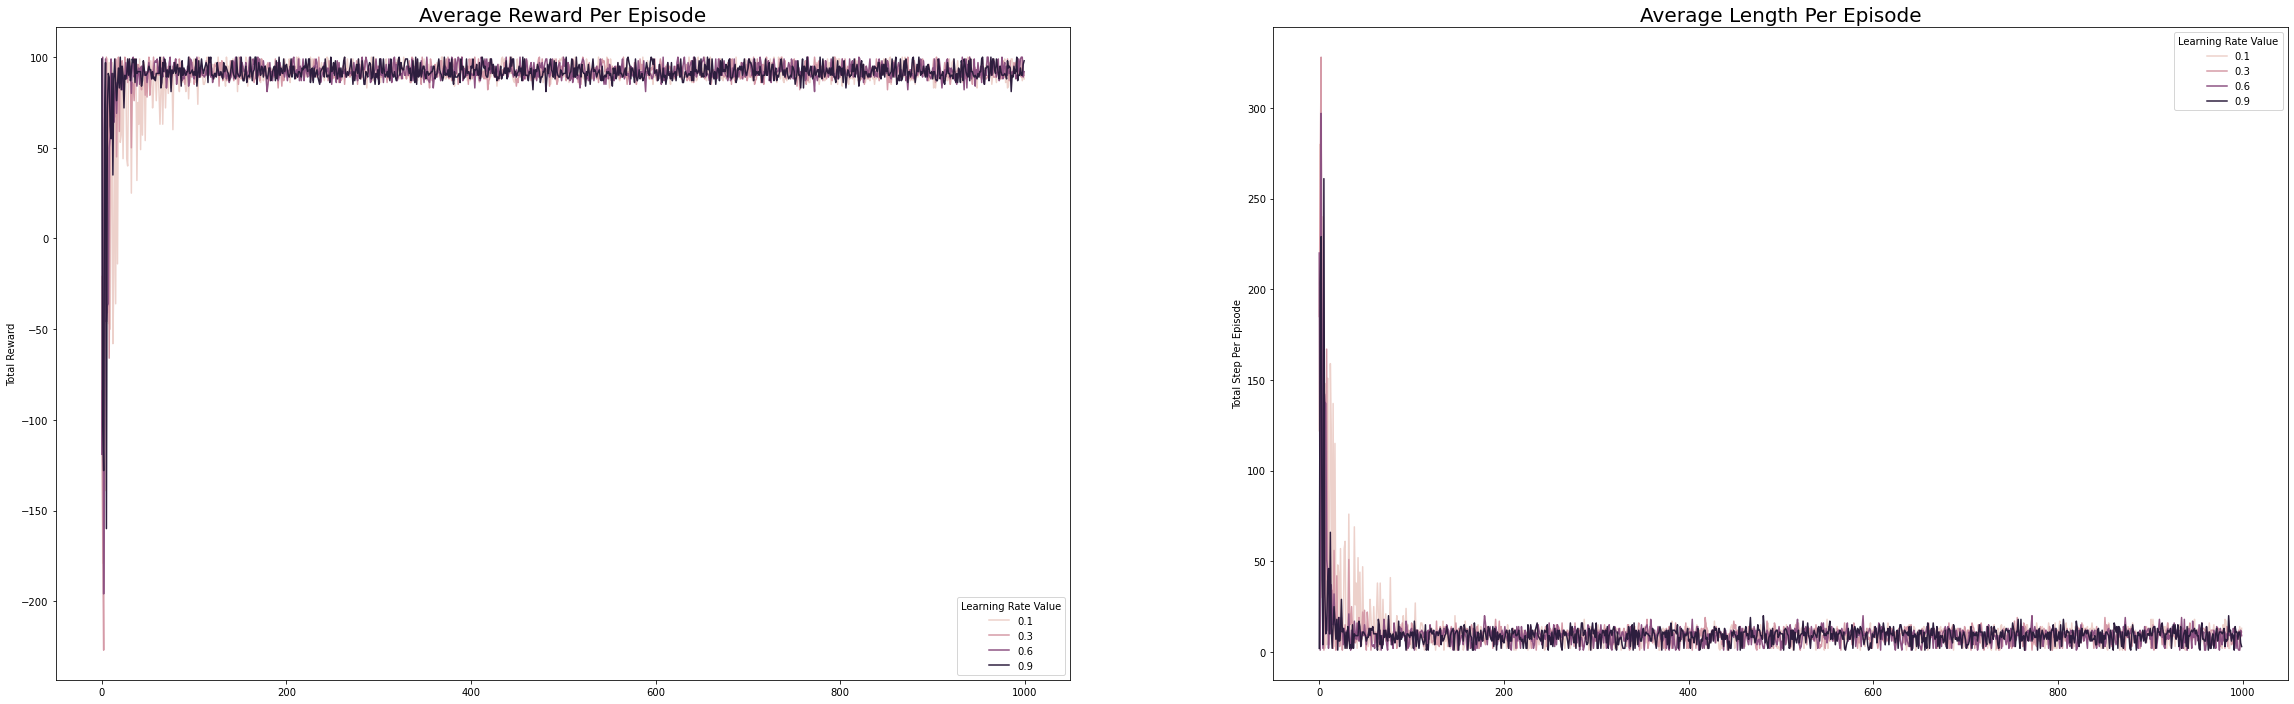

In [136]:
plt.figure(figsize = (40,12))
plt.subplot(1, 2, 1)
sns.lineplot(data=chart_data, x=chart_data.index, y='Total Reward', hue='Learning Rate Value')
plt.title('Average Reward Per Episode', fontsize = 20)

#plt.figure(figsize = (16,12))
plt.subplot(1, 2, 2)
sns.lineplot(data=chart_data, x=chart_data.index, y='Total Step Per Episode', hue='Learning Rate Value')
plt.title('Average Length Per Episode', fontsize = 20)
plt.show()


## Hyperparameter Tuning - Discount Factor

In [137]:
# Learning params
alpha = 1
discount_factor = [0.8, 0.6, 0.4, 0.2]
epsilon = 0.9

chart_data = []

# States and Actions
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

goal_state = 29

# R matrix
possible_actions = [(0,1), (1,0), (1,4), (2,6), (3,8), (4,1), (4,5), (5,4), (5,6), (6,2), (6,5), (6,7), (6,11), (7,6), (7,8), (8,3), (8,7), (8,9), (9,8), (10,12), (11,6), (11,15), (12,10), (12,13), (13,12), (13,14), (13,19), (14,13), (14,15), (15,11), (15,14), (15,16), (16,15), (16,17), (16,20), (17,16), (17,18), (18,17), (18,21), (19,13), (19,22), (20,16), (20,23), (21,18), (22,19), (22,26), (23,20), (23,24), (24,23), (24,28), (25,26), (26,22), (26,25), (26,27), (27,26), (28,24), (28,29), (29,28)]

for gamma in discount_factor:

    for s,a in possible_actions:
        if a == 29:
            R[s,a] = 100
        else:
            R[s,a] = -1

    # # Q matrix
    Q = np.zeros(R.shape)
    total_reward = []
    total_step_per_episode = []

    for episode in range(1000):
        s = np.random.choice(len(S))
        #print("Starting state is '{}'".format(S[s]))
        episode_reward = 0
        stepcount = 0
        for timestep in range(500):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > epsilon:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            episode_reward += r
            #print(episode_reward)
            stepcount = stepcount + 1
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])

            if S[s] == goal_state:
                break
        total_reward.append(episode_reward)
        total_step_per_episode.append(stepcount)
    chart_data_per_discount_factor = pd.DataFrame({'Total Reward': total_reward, 'Total Step Per Episode': total_step_per_episode, 'Discount Factor': gamma})
    chart_data.append(chart_data_per_discount_factor)
    

    
chart_data = pd.concat(chart_data)
print (chart_data)



     Total Reward  Total Step Per Episode  Discount Factor
0            50.0                      51              0.8
1            -5.0                     106              0.8
2            72.0                      29              0.8
3           100.0                       1              0.8
4            52.0                      49              0.8
..            ...                     ...              ...
995        -221.0                     322              0.2
996          99.0                       2              0.2
997        -145.0                     246              0.2
998        -155.0                     256              0.2
999        -145.0                     246              0.2

[4000 rows x 3 columns]


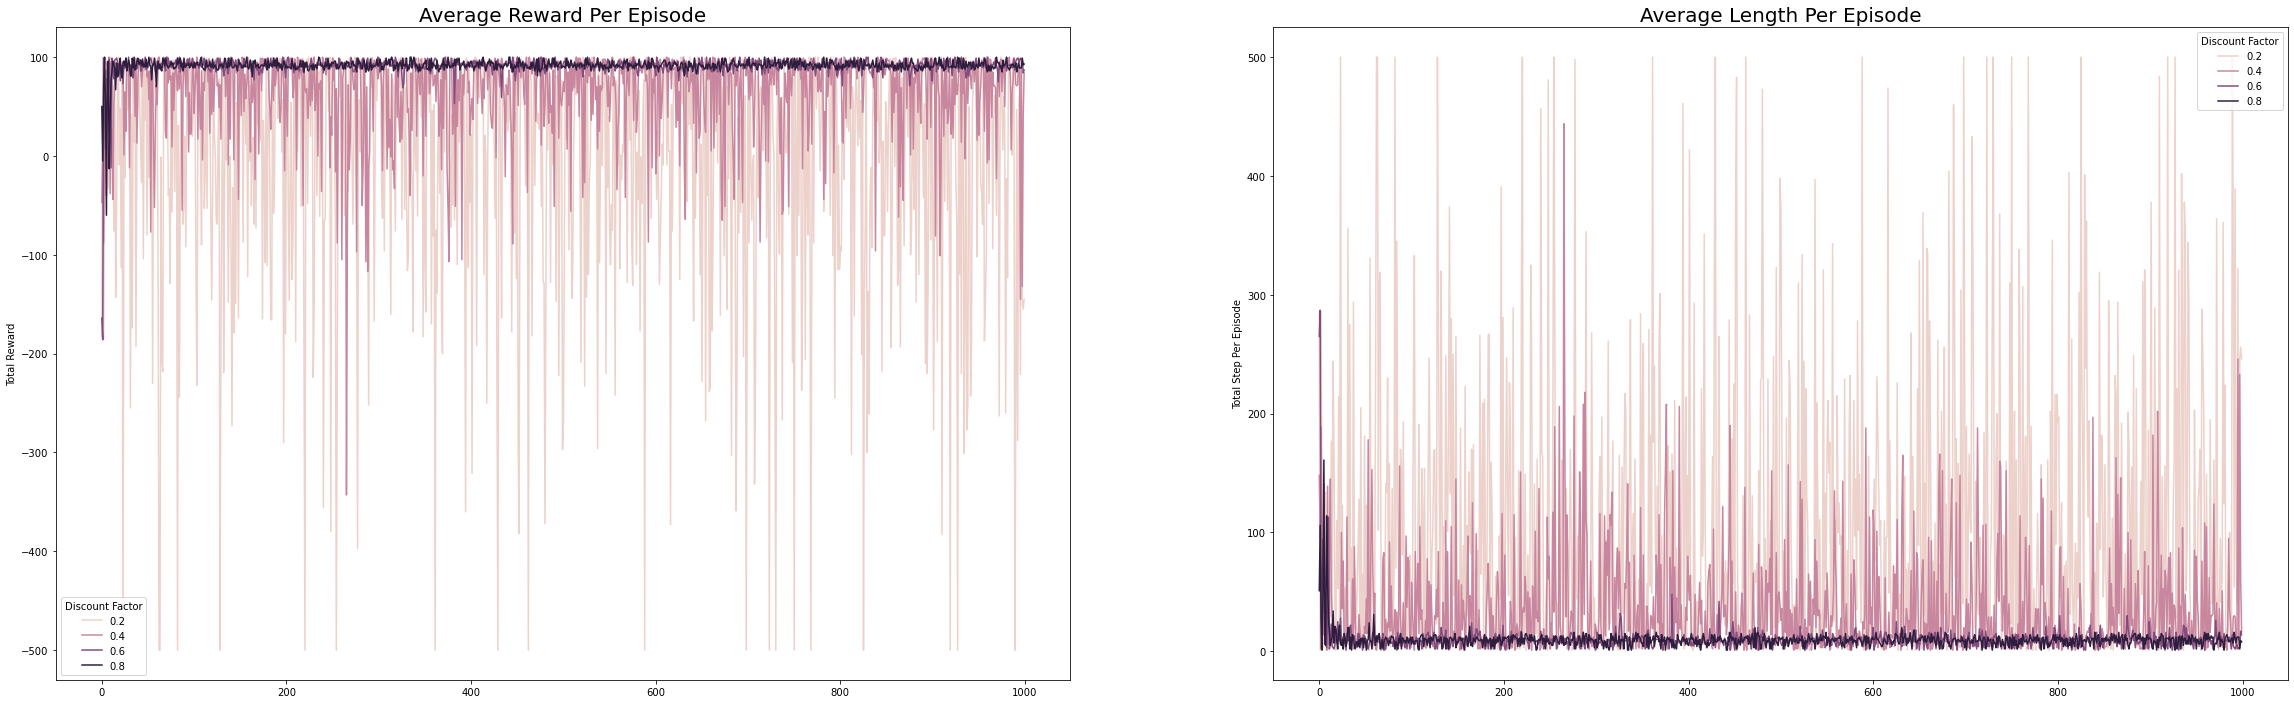

In [138]:
plt.figure(figsize = (40,12))
plt.subplot(1, 2, 1)
sns.lineplot(data=chart_data, x=chart_data.index, y='Total Reward', hue='Discount Factor')
plt.title('Average Reward Per Episode', fontsize = 20)

plt.subplot(1, 2, 2)
sns.lineplot(data=chart_data, x=chart_data.index, y='Total Step Per Episode', hue='Discount Factor')
plt.title('Average Length Per Episode', fontsize = 20)

plt.show()


## Hyperparameter Tuning - Epsilon

In [139]:
# Learning params
alpha = 1
discount_factor = 0.8
eps = 0.9
epsilon = [0.9, 0.6, 0.3, 0.1]

chart_data = []

# States and Actions
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

goal_state = 29

# R matrix
possible_actions = [(0,1), (1,0), (1,4), (2,6), (3,8), (4,1), (4,5), (5,4), (5,6), (6,2), (6,5), (6,7), (6,11), (7,6), (7,8), (8,3), (8,7), (8,9), (9,8), (10,12), (11,6), (11,15), (12,10), (12,13), (13,12), (13,14), (13,19), (14,13), (14,15), (15,11), (15,14), (15,16), (16,15), (16,17), (16,20), (17,16), (17,18), (18,17), (18,21), (19,13), (19,22), (20,16), (20,23), (21,18), (22,19), (22,26), (23,20), (23,24), (24,23), (24,28), (25,26), (26,22), (26,25), (26,27), (27,26), (28,24), (28,29), (29,28)]

for ep in epsilon:

    for s,a in possible_actions:
        if a == 29:
            R[s,a] = 100
        else:
            R[s,a] = -1

    # # Q matrix
    Q = np.zeros(R.shape)
    total_reward = []
    total_step_per_episode = []

    for episode in range(1000):
        s = np.random.choice(len(S))
        #print("Starting state is '{}'".format(S[s]))
        episode_reward = 0
        stepcount = 0
        for timestep in range(500):
            # Action selection
            available_actions = np.where(~np.isnan(R[s]))[0]
            q_values = [Q[s,a] for a in available_actions]
            best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
            best_actions_q_values = [Q[s,x] for x in best_actions]

            # Epsilon-greedy
            if np.random.uniform() > eps:
                a = np.random.choice(available_actions)
            else:
                a = np.random.choice(best_actions)

            # Environment updating
            r = R[s,a]
            episode_reward += r
            #print(episode_reward)
            stepcount = stepcount + 1
            s_old = s
            s = a 

            # Q value updating
            Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])

            if S[s] == goal_state:
                break
        total_reward.append(episode_reward)
        total_step_per_episode.append(stepcount)
    chart_data_per_epsilon = pd.DataFrame({'Total Reward': total_reward, 'Total Step Per Episode': total_step_per_episode, 'Epsilon': ep})
    chart_data.append(chart_data_per_epsilon)

chart_data = pd.concat(chart_data)
print (chart_data)



     Total Reward  Total Step Per Episode  Epsilon
0          -117.0                     218      0.9
1            29.0                      72      0.9
2           -25.0                     126      0.9
3            99.0                       2      0.9
4          -500.0                     500      0.9
..            ...                     ...      ...
995          91.0                      10      0.1
996        -116.0                     217      0.1
997          81.0                      20      0.1
998          40.0                      61      0.1
999          99.0                       2      0.1

[4000 rows x 3 columns]


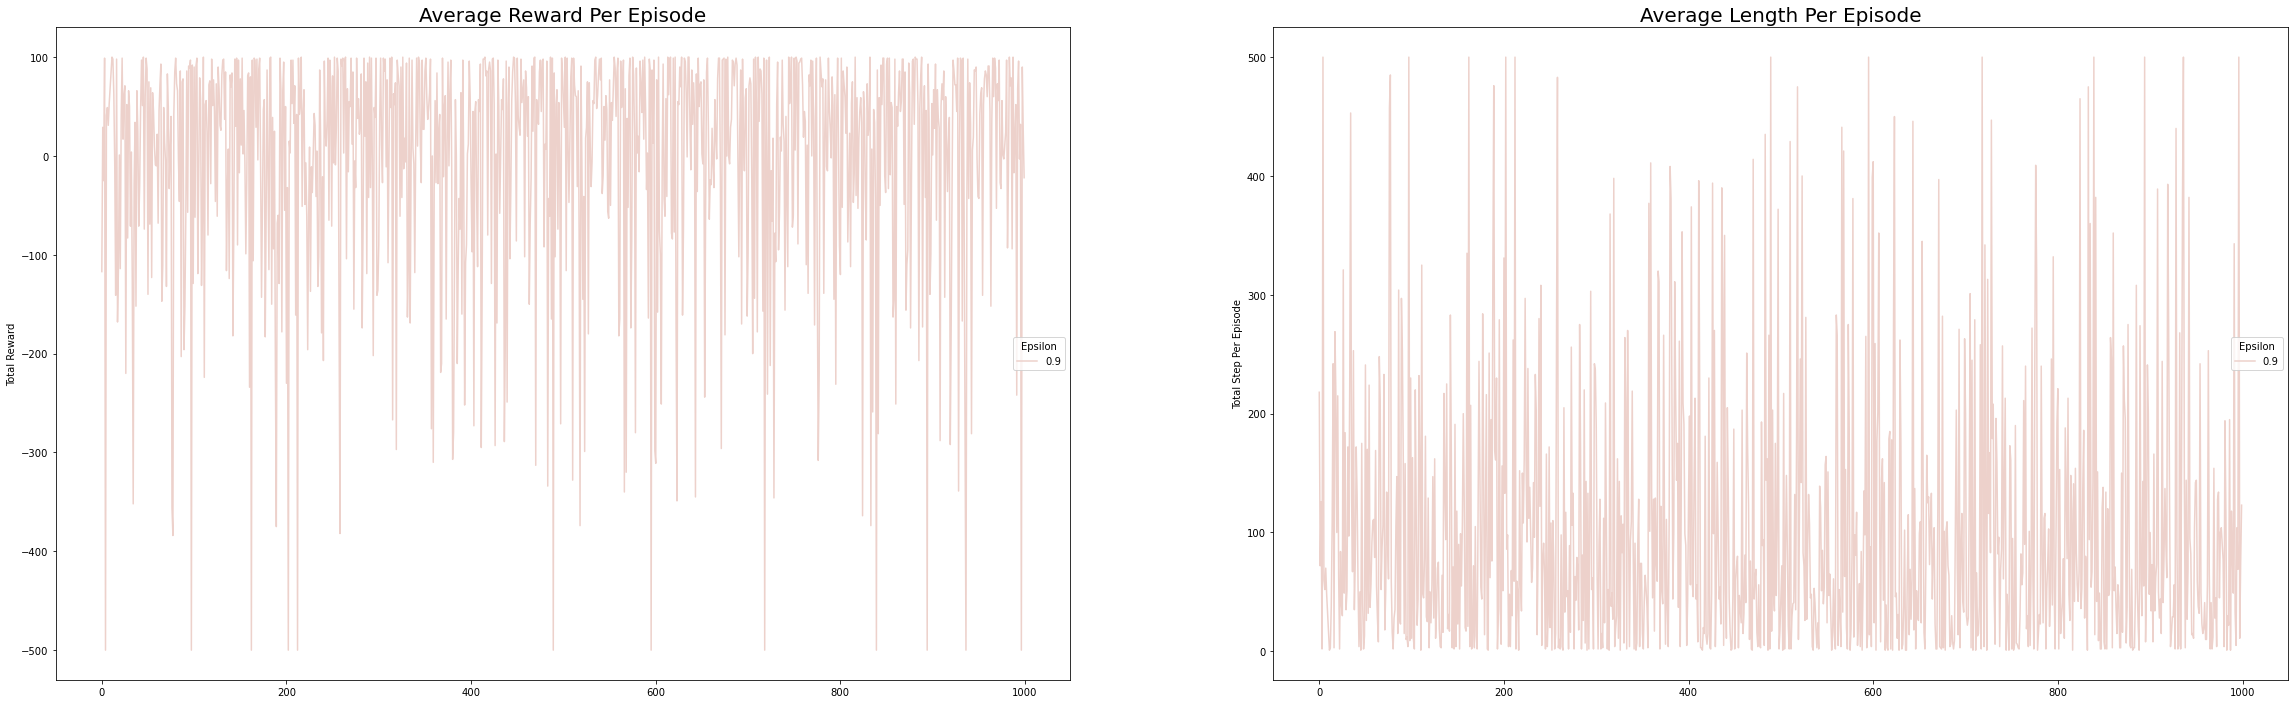

In [140]:
chart_data1 = chart_data.loc[chart_data['Epsilon'] == 0.9]
plt.figure(figsize = (40,12))
plt.subplot(1, 2, 1)
sns.lineplot(data=chart_data1, x=chart_data1.index, y='Total Reward', hue='Epsilon')
plt.title('Average Reward Per Episode', fontsize = 20)

plt.subplot(1, 2, 2)
sns.lineplot(data=chart_data1, x=chart_data1.index, y='Total Step Per Episode', hue='Epsilon')
plt.title('Average Length Per Episode', fontsize = 20)

plt.show()

